# Simulation for Spoofing Case

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from model import SimulationModel

# Spoofing Simulation

## Upward Movement

### Run Simulation

In [6]:
# number of agents
num_ZI = 100  # number of ZI agents
num_F = 200  # number of fundamentalists agents
num_C = 200  # number of chartists agents

# agent parameters
ZI_params = {'order_price_lambda': 0.8, 'order_price_sig': 0.25, 'order_size_multiplier': 1}
F_params = {'a_lower': 0.1, 'a_upper': 0.15, 'h_sig_lower': 1.0, 'h_sig_upper': 2.0, 'order_duration': 15, 'order_life': 5, 'order_size_sigma': 2.5, 'order_size_lower': 1.0, 'order_size_upper': 10.0, 'order_price_sigma': 0.25, 'order_price_lambda': 0.8, 'order_size_gamma': 3.0}
C_params = {'c_lower': 0.0025, 'c_upper': 0.01, 'L_lower': 3, 'L_upper': 10, 'h_sig_lower':0.1, 'h_sig_upper': 0.2, 'order_duration': 5, 'order_life': 5, 'order_size_sigma': 2.5, 'order_size_lower': 1.0, 'order_size_upper': 10.0, 'order_price_sigma': 0.25, 'order_price_lambda': 0.8, 'order_size_gamma': 3.0, 'd_lower': 0.08, 'd_upper': 0.1, 'Tsp_lower': 1.4, 'Tsp_upper': 2.0}
S_params = {'direction': 'up', 'arrival_time': 1000, 'manipulate_price': 500, 'order_size_ratio': 0.6, 'order_insert_location': 0.7, 'order_revising_duration': 0, 'order_size_increment_step': 0.01}

# number of simulation times
num_sim_times = 2000

# run simulation
model = SimulationModel(num_ZI=num_ZI, 
                        num_F=num_F,
                        num_C=num_C,
                        ZI_params=ZI_params,
                        F_params=F_params,
                        C_params=C_params,
                        spoofing=True,
                        S_params=S_params)

for _ in tqdm(range(num_sim_times)):
    model.step()

# extract results
price_series = np.array(model.price_series)
return_series = np.array(model.get_return_series())
spread_series = np.array(model.spread_series)
ask_vol_series = np.array(model.ask_volume)
bid_vol_series = np.array(model.bid_volume)
f_h = np.array(model.heuristic_avg[1])
c_h = np.array(model.heuristic_avg[2])
f_actions = np.array(model.agent_groups[1].agents_traded_action_record)
f_order_prices = np.array(model.agent_groups[1].agents_traded_price_record)
c_actions = np.array(model.agent_groups[2].agents_traded_action_record)
c_order_prices = np.array(model.agent_groups[2].agents_traded_price_record)


# save
cwd = os.path.join(os.getcwd(), 'spoofing_simulation/upward')
print(cwd)
np.save(os.path.join(cwd, 'price_series.npy'), price_series)
np.save(os.path.join(cwd, 'return_series.npy'), return_series)
np.save(os.path.join(cwd, 'spread_series.npy'), spread_series)
np.save(os.path.join(cwd, 'ask_vol_series.npy'), ask_vol_series)
np.save(os.path.join(cwd, 'bid_vol_series.npy'), bid_vol_series)
np.save(os.path.join(cwd, 'f_h.npy'), f_h)
np.save(os.path.join(cwd, 'f_actions.npy'), f_actions)
np.save(os.path.join(cwd, 'f_order_prices.npy'), f_order_prices)
np.save(os.path.join(cwd, 'c_h.npy'), c_h)
np.save(os.path.join(cwd, 'c_actions.npy'), c_actions)
np.save(os.path.join(cwd, 'c_order_prices.npy'), c_order_prices)

100%|██████████| 2000/2000 [00:53<00:00, 37.61it/s]


/Users/lihaohang/Desktop/ABM-Reseach_for_relative_to_bid using_now copy/spoofing_simulation/upward


### Load Previous Result

In [7]:
num_sim_times = 2000
cwd = os.path.join(os.getcwd(), 'spoofing_simulation/upward')
price_series = np.load(os.path.join(cwd, 'price_series.npy'))
return_series = np.load(os.path.join(cwd, 'return_series.npy'))
spread_series = np.load(os.path.join(cwd, 'spread_series.npy'))
ask_vol_series = np.load(os.path.join(cwd, 'ask_vol_series.npy'))
bid_vol_series = np.load(os.path.join(cwd, 'bid_vol_series.npy'))
f_h = np.load(os.path.join(cwd, 'f_h.npy'))
c_h = np.load(os.path.join(cwd, 'c_h.npy'))
f_actions = np.load(os.path.join(cwd, 'f_actions.npy'))
f_order_prices = np.load(os.path.join(cwd, 'f_order_prices.npy'))
c_actions = np.load(os.path.join(cwd, 'c_actions.npy'))
c_order_prices = np.load(os.path.join(cwd, 'c_order_prices.npy'))
ratio_series = ask_vol_series / bid_vol_series

### Order Depth & Price

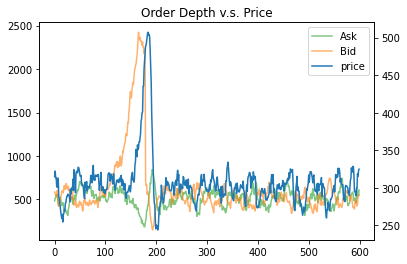

In [8]:
fig, ax1 = plt.subplots(1, 1)
x = np.array(range(num_sim_times))
ax2 = ax1.twinx()
ln1 = ax1.plot(ask_vol_series[900:1500], label='Ask', alpha=0.6, color='#2ca02c')
ln2 = ax1.plot(bid_vol_series[900:1500], label='Bid', alpha=0.6, color='#ff7f0e')
ln3 = ax2.plot(price_series[900:1500], color='#1f77b4', label='price')
leg = ln1 + ln2 + ln3
labs = [l.get_label() for l in leg]
plt.legend(leg, labs)
plt.title('Order Depth v.s. Price')
# plt.savefig(os.path.join('result_plots', 'upward_spoofing_simulation.png'), dpi=1200)
plt.show()

### Market Dynamics

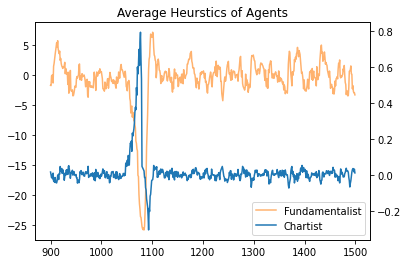

In [9]:
fig, ax1 = plt.subplots(1, 1)
x = np.array(range(900, 1500))
ax2 = ax1.twinx()
ln1 = ax1.plot(x, f_h[900:1500], label='Fundamentalist', alpha=0.6, color='#ff7f0e')
ln3 = ax2.plot(x, c_h[900:1500], color='#1f77b4', label='Chartist')
leg = ln1 + ln3
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs)
plt.title('Average Heurstics of Agents')
# plt.savefig(os.path.join('result_plots', 'upward_spoofing_simulation_h.png'), dpi=1200)
plt.show()

### Profit:

In [10]:
# f_actions = np.array(model.agent_groups[1].agents_traded_action_record)
# f_order_prices = np.array(model.agent_groups[1].agents_traded_price_record)
print(f'Num bid actions: {np.sum(f_actions > 0)}')
print(f'Num ask actions: {np.sum(f_actions < 0)}')

# chartis
# c_actions = np.array(model.agent_groups[2].agents_traded_action_record)
# c_order_prices = np.array(model.agent_groups[2].agents_traded_price_record)
print(f'Num bid actions: {np.sum(c_actions > 0)}')
print(f'Num ask actions: {np.sum(c_actions < 0)}')

# extract profit helper
def profit_agent(id, actions, order_prices, price_series):
    result = []
    for i in range(len(price_series) - 1):
        cur_actions = actions[i][id]
        # if the order is buy order
        if cur_actions == 1:
            profit = price_series[i] - order_prices[i][id] # 300, 290 = 10
        elif cur_actions == -1:
            profit = order_prices[i][id] - price_series[i]
        else:
            profit = np.nan
        result.append(profit)

    return np.array(result)

def profit_agent_multiple(num_agents, actions, order_prices, price_series):
    return np.array([
        profit_agent(i, actions, order_prices, price_series)
        for i in range(num_agents)
    ])

f_profit = profit_agent_multiple(200, f_actions, f_order_prices, price_series[4:])
c_profit = profit_agent_multiple(200, c_actions, c_order_prices, price_series[4:])

f_profit_mean = np.nanmean(f_profit, axis=0)
c_profit_mean = np.nanmean(c_profit, axis=0)

Num bid actions: 2033
Num ask actions: 2118
Num bid actions: 5680
Num ask actions: 5661


/var/folders/8t/25bylpkn3pdclkh1jxlsv_s80000gn/T/ipykernel_26619/1149602610.py:37: RuntimeWarning: Mean of empty slice
  f_profit_mean = np.nanmean(f_profit, axis=0)
/var/folders/8t/25bylpkn3pdclkh1jxlsv_s80000gn/T/ipykernel_26619/1149602610.py:38: RuntimeWarning: Mean of empty slice
  c_profit_mean = np.nanmean(c_profit, axis=0)


Fundamentalist

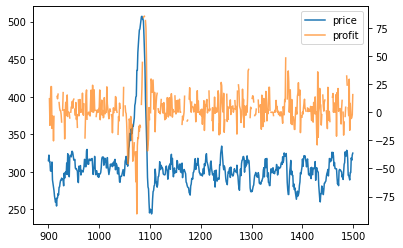

In [11]:
fig, ax1 = plt.subplots(1, 1)
x = np.array(range(900, 1500))
ax2 = ax1.twinx()
ln1 = ax1.plot(x, price_series[900:1500], color='#1f77b4', label='price')
ln2 = ax2.plot(x, f_profit_mean[900:1500], alpha=0.7, color='#ff7f0e', label='profit')
leg = ln1 + ln2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs)
# plt.savefig(os.path.join('result_plots', 'upward_spoofing_simulation_profit_f.png'), dpi=1200)
plt.show()

Chartist:

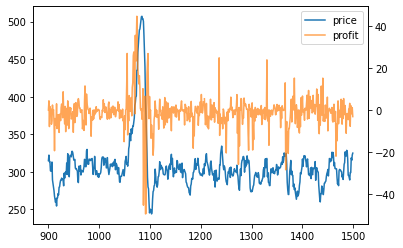

In [12]:
fig, ax1 = plt.subplots(1, 1)
x = np.array(range(900, 1500))
ax2 = ax1.twinx()
ln1 = ax1.plot(x, price_series[900:1500], alpha=1.0, color='#1f77b4', label='price')
ln2 = ax2.plot(x, c_profit_mean[900:1500], alpha=0.7, color='#ff7f0e', label='profit')
leg = ln1 + ln2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs)
# plt.savefig(os.path.join('result_plots', 'upward_spoofing_simulation_profit_c.png'), dpi=1200)
plt.show()

## Downward Movement

### Run Simulation

In [8]:
# number of agents
num_ZI = 100  # number of ZI agents
num_F = 200  # number of fundamentalists agents
num_C = 200  # number of chartists agents

# agent parameters
# agent parameters
ZI_params = {'order_price_lambda': 0.8, 'order_price_sig': 0.25, 'order_size_multiplier': 1}
F_params = {'a_lower': 0.1, 'a_upper': 0.15, 'h_sig_lower': 1.0, 'h_sig_upper': 2.0, 'order_duration': 15, 'order_life': 5, 'order_size_sigma': 2.5, 'order_size_lower': 1.0, 'order_size_upper': 10.0, 'order_price_sigma': 0.25, 'order_price_lambda': 0.8, 'order_size_gamma': 3.0}
C_params = {'c_lower': 0.0025, 'c_upper': 0.01, 'L_lower': 3, 'L_upper': 10, 'h_sig_lower':0.1, 'h_sig_upper': 0.2, 'order_duration': 5, 'order_life': 5, 'order_size_sigma': 2.5, 'order_size_lower': 1.0, 'order_size_upper': 10.0, 'order_price_sigma': 0.25, 'order_price_lambda': 0.8, 'order_size_gamma': 3.0, 'd_lower': 0.08, 'd_upper': 0.1, 'Tsp_lower': 1.4, 'Tsp_upper': 2.0}
S_params = {'direction': 'down', 'arrival_time': 1000, 'manipulate_price': 100, 'order_size_ratio': 0.6, 'order_insert_location': 1.3, 'order_revising_duration': 0, 'order_size_increment_step': 0.01}

# number of simulation times
num_sim_times = 2000

# run simulation
model = SimulationModel(num_ZI=num_ZI, 
                        num_F=num_F,
                        num_C=num_C,
                        ZI_params=ZI_params,
                        F_params=F_params,
                        C_params=C_params,
                        spoofing=True,
                        S_params=S_params)

for _ in tqdm(range(num_sim_times)):
    model.step()


# extract results
price_series = np.array(model.price_series)
return_series = np.array(model.get_return_series())
spread_series = np.array(model.spread_series)
ask_vol_series = np.array(model.ask_volume)
bid_vol_series = np.array(model.bid_volume)
f_h = np.array(model.heuristic_avg[1])
c_h = np.array(model.heuristic_avg[2])
f_actions = np.array(model.agent_groups[1].agents_traded_action_record)
f_order_prices = np.array(model.agent_groups[1].agents_traded_price_record)
c_actions = np.array(model.agent_groups[2].agents_traded_action_record)
c_order_prices = np.array(model.agent_groups[2].agents_traded_price_record)


# save
cwd = os.path.join(os.getcwd(), 'spoofing_simulation/downward')
print(cwd)
np.save(os.path.join(cwd, 'price_series.npy'), price_series)
np.save(os.path.join(cwd, 'return_series.npy'), return_series)
np.save(os.path.join(cwd, 'spread_series.npy'), spread_series)
np.save(os.path.join(cwd, 'ask_vol_series.npy'), ask_vol_series)
np.save(os.path.join(cwd, 'bid_vol_series.npy'), bid_vol_series)
np.save(os.path.join(cwd, 'f_h.npy'), f_h)
np.save(os.path.join(cwd, 'f_actions.npy'), f_actions)
np.save(os.path.join(cwd, 'f_order_prices.npy'), f_order_prices)
np.save(os.path.join(cwd, 'c_h.npy'), c_h)
np.save(os.path.join(cwd, 'c_actions.npy'), c_actions)
np.save(os.path.join(cwd, 'c_order_prices.npy'), c_order_prices)

100%|██████████| 2000/2000 [00:45<00:00, 43.70it/s]


843
/Users/lihaohang/Desktop/ABM-Reseach_for_relative_to_bid using_now copy/spoofing_simulation/downward


### Load Previous Result

In [43]:
cwd = os.path.join(os.getcwd(), 'spoofing_simulation/downward')
price_series = np.load(os.path.join(cwd, 'price_series.npy'))
return_series = np.load(os.path.join(cwd, 'return_series.npy'))
spread_series = np.load(os.path.join(cwd, 'spread_series.npy'))
ask_vol_series = np.load(os.path.join(cwd, 'ask_vol_series.npy'))
bid_vol_series = np.load(os.path.join(cwd, 'bid_vol_series.npy'))
f_h = np.load(os.path.join(cwd, 'f_h.npy'))
c_h = np.load(os.path.join(cwd, 'c_h.npy'))
f_actions = np.load(os.path.join(cwd, 'f_actions.npy'))
f_order_prices = np.load(os.path.join(cwd, 'f_order_prices.npy'))
c_actions = np.load(os.path.join(cwd, 'c_actions.npy'))
c_order_prices = np.load(os.path.join(cwd, 'c_order_prices.npy'))
ratio_series = ask_vol_series / bid_vol_series

### Order Depth & Price

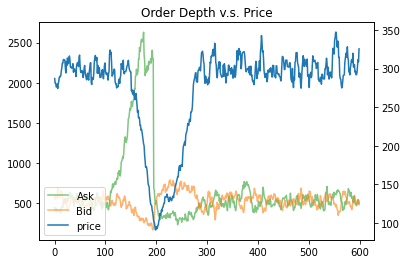

In [44]:
fig, ax1 = plt.subplots(1, 1)
x = np.array(range(num_sim_times))
ax2 = ax1.twinx()
ln1 = ax1.plot(ask_vol_series[900:1500], label='Ask', alpha=0.6, color='#2ca02c')
ln2 = ax1.plot(bid_vol_series[900:1500], label='Bid', alpha=0.6, color='#ff7f0e')
ln3 = ax2.plot(price_series[900:1500], color='#1f77b4', label='price')
leg = ln1 + ln2 + ln3
labs = [l.get_label() for l in leg]
plt.legend(leg, labs)
plt.title('Order Depth v.s. Price')
#plt.savefig(os.path.join('result_plots', 'downward_spoofing_simulation.png'), dpi=1200)
plt.show()

### Market Dynamics

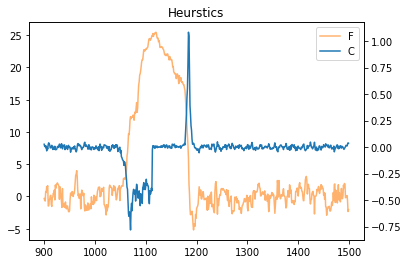

In [206]:
fig, ax1 = plt.subplots(1, 1)
x = np.array(range(900, 1500))
ax2 = ax1.twinx()
ln1 = ax1.plot(x, f_h[900:1500], label='F', alpha=0.6, color='#ff7f0e')
ln3 = ax2.plot(x, c_h[900:1500], color='#1f77b4', label='C')
leg = ln1 + ln3
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs)
plt.title('Heurstics')
plt.show()

### Market Dynamics

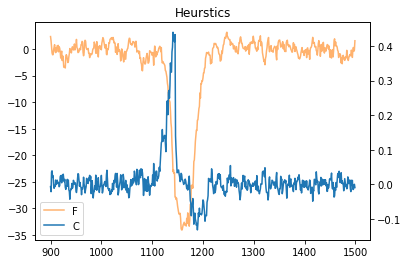

In [13]:
fig, ax1 = plt.subplots(1, 1)
x = np.array(range(900, 1500))
ax2 = ax1.twinx()
ln1 = ax1.plot(x, f_h[900:1500], label='F', alpha=0.6, color='#ff7f0e')
ln3 = ax2.plot(x, c_h[900:1500], color='#1f77b4', label='C')
leg = ln1 + ln3
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs)
plt.title('Heurstics')
plt.show()

# Spoofing Detrimental Effect

In [27]:
cwd = os.path.join(os.getcwd(), 'spoofing_simulation', 'detrimental_effect')

## Load Result

In [28]:
prices = np.load(os.path.join(cwd, 'prices.npy'))
rets = np.load(os.path.join(cwd, 'returns.npy'))
f_actions = np.load(os.path.join(cwd, 'f_actions_series.npy'))
f_order_prices = np.load(os.path.join(cwd, 'f_order_prices_series.npy'))
c_actions = np.load(os.path.join(cwd, 'c_actions_series.npy'))
c_order_prices = np.load(os.path.join(cwd, 'c_order_prices_series.npy'))

In [29]:
prices_pooled_normal = prices[:, 1500:2000]
rets_pooled_normal = rets[:, 1500:2000]

print(prices_pooled_normal.shape)
print(rets_pooled_normal.shape)

(100, 500)
(100, 500)


## Volatility

In [30]:
def get_spoofing_interval(price_series, spoofing_start=1000):
    result = []
    for i in range(price_series.shape[0]):
        reach_spoofing_index = np.argmax(prices[i] > 500)
        return_to_normal_index = np.argmax((np.abs(prices[i, reach_spoofing_index:] - 300)) < 10)
        spoofing_end_index = reach_spoofing_index + return_to_normal_index
        result.append(spoofing_end_index)
    
    return result

In [31]:
# spoofing volatility
end_index = get_spoofing_interval(prices)
prices_subset=prices[np.array(end_index) > 1000]
end_index = [i for i in end_index if i > 1000]
spoofing_subset = [cur_series[1000:cur_end] for cur_series, cur_end in zip(prices_subset, end_index)]
spoofing_ret = [cur_series[1:]/cur_series[:-1] - 1 for cur_series in spoofing_subset]
spoofing_vol = [np.std(cur_series) for cur_series in spoofing_ret]

# normal volatility
volatility_normal = np.std(rets_pooled_normal, axis=1)[:-(100 - len(spoofing_vol))]
print(len(spoofing_vol))

98


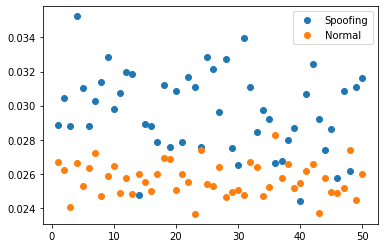

In [34]:

plt.plot(range(1, 51), spoofing_vol[:50], 'o', label = 'Spoofing')
plt.plot(range(1, 51), volatility_normal[:50], 'o', label = 'Normal')
plt.legend()
plt.savefig('result_plots/volatility_spoofing.png', dpi=2000)
plt.show()

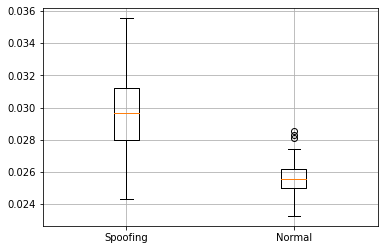

In [18]:
plt.boxplot(x=[spoofing_vol, volatility_normal], vert=True, labels=['Spoofing', 'Normal'])
plt.grid()
# plt.savefig('result_plots/volatility_spoofing_boxplot.png', dpi=2000)
plt.show()

In [207]:
import scipy.stats as stats
stats.ttest_ind(a=spoofing_vol, b=volatility_normal, equal_var=False, alternative='greater')

Ttest_indResult(statistic=2.0810993926438193, pvalue=0.01951876328901942)